In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict
from sklearn.preprocessing import MinMaxScaler

In [2]:

df = pd.read_csv('dataset_train+test2 copy .csv', sep=",") #sostituisci con tuo percorso
dateparse = lambda dates: pd.to_datetime(df['date'])

df_ts = pd.read_csv('dataset_train+test2 copy .csv', sep=",",
                 parse_dates=True, index_col='date', date_parser=dateparse)

In [3]:
scaler = MinMaxScaler()
X=scaler.fit_transform(df[["Temperature","Humidity","Light", "CO2", "Ora", "absH"]].values)
i=0

for col in df[["Temperature","Humidity","Light", "CO2", "Ora", "absH"]]:
    df[col] = X[:,i]
    i+=1

    

In [5]:
thur1 = df_ts[df_ts.day==5]
thur1.reset_index(inplace=True)
ts1 = thur1.Humidity

fri1 = df_ts[df_ts.day==6]
fri1.reset_index(inplace=True)
ts2 = fri1.Humidity

sat1 = df_ts[df_ts.day==7]
sat1.reset_index(inplace=True)
ts3 = sat1.Humidity

sun1 = df_ts[df_ts.day==8]
sun1.reset_index(inplace=True)
ts4 = sun1.Humidity

mon2 = df_ts[df_ts.day==9]
mon2.reset_index(inplace=True)
ts5 = mon2.Humidity

thur2 = df_ts[df_ts.day==12]
thur2.reset_index(inplace=True)
ts6 = thur2.Humidity

fri2 = df_ts[df_ts.day==13]
fri2.reset_index(inplace=True)
ts7 = fri2.Humidity

sat2 = df_ts[df_ts.day==14]
sat2.reset_index(inplace=True)
ts8 = sat2.Humidity

sun2 = df_ts[df_ts.day==15]
sun2.reset_index(inplace=True)
ts9 = sun2.Humidity

mon3 = df_ts[df_ts.day==16]
mon3.reset_index(inplace=True)
ts10 = mon3.Humidity

thue3 = df_ts[df_ts.day==17]
thue3.reset_index(inplace=True)
ts11 = thue3.Humidity



In [6]:
df_ts = [ts1,ts2,ts3,ts4,ts5,ts6,ts7,ts8,ts9,ts10,ts11]



In [8]:
X = np.array(df_ts)
X[3]

array([29.39      , 29.46333333, 29.5       , ..., 27.1       ,
       27.1       , 27.1       ])

In [9]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.generators import random_walks

/Users/francescosalerno/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


In [10]:
km = TimeSeriesKMeans(n_clusters=2, metric="euclidean", max_iter=10, random_state=0)


In [11]:
km.fit(X)

TimeSeriesKMeans(dtw_inertia=False, init='k-means++', max_iter=10,
                 max_iter_barycenter=100, metric='euclidean',
                 metric_params=None, n_clusters=2, n_init=1, n_jobs=None,
                 random_state=0, tol=1e-06, verbose=0)

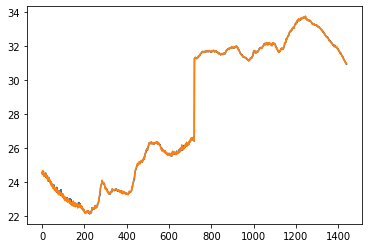

In [12]:
plt.plot(km.cluster_centers_.reshape(X.shape[1], 2))
plt.show()

In [13]:
km.labels_

array([0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1])

In [14]:
km.inertia_

17723.184531321633

In [15]:
km_dtw = TimeSeriesKMeans(n_clusters=2, metric="dtw", max_iter=5, random_state=0)
km_dtw.fit(X)

TimeSeriesKMeans(dtw_inertia=False, init='k-means++', max_iter=5,
                 max_iter_barycenter=100, metric='dtw', metric_params=None,
                 n_clusters=2, n_init=1, n_jobs=None, random_state=0, tol=1e-06,
                 verbose=0)

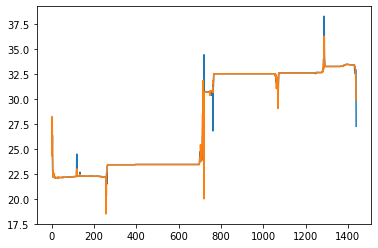

In [16]:
plt.plot(km_dtw.cluster_centers_.reshape(X.shape[1], 2))
plt.show()

In [17]:
km_dtw.labels_

array([0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1])

In [18]:
km_dtw.inertia_

2180.54133786278

In [19]:
from tslearn.piecewise import PiecewiseAggregateApproximation
from tslearn.piecewise import SymbolicAggregateApproximation
from tslearn.piecewise import OneD_SymbolicAggregateApproximation

In [20]:
n_paa_segments = 22
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
X_paa = paa.fit_transform(X)

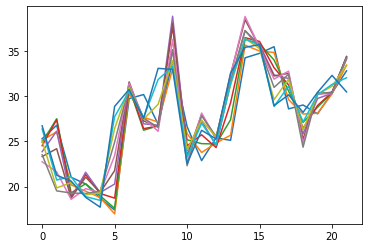

In [21]:
plt.plot(X_paa.reshape(X_paa.shape[1], X_paa.shape[0]))
plt.show()

In [22]:
km = TimeSeriesKMeans(n_clusters=2, metric="euclidean", max_iter=5, random_state=0)
km.fit(X_paa)

TimeSeriesKMeans(dtw_inertia=False, init='k-means++', max_iter=5,
                 max_iter_barycenter=100, metric='euclidean',
                 metric_params=None, n_clusters=2, n_init=1, n_jobs=None,
                 random_state=0, tol=1e-06, verbose=0)

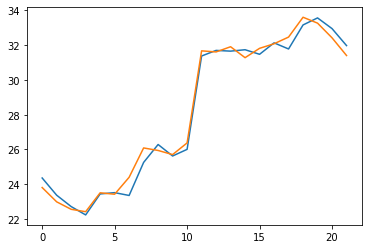

In [23]:
plt.plot(km.cluster_centers_.reshape(X_paa.shape[1], 2))
plt.show()

In [24]:
km.labels_

array([0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1])

/Users/francescosalerno/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/francescosalerno/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


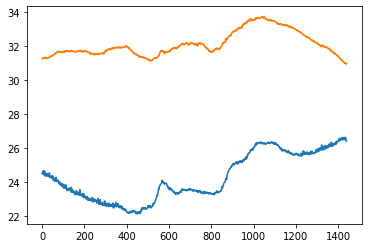

In [25]:
for i in range(3):
    plt.plot(np.mean(X[np.where(km.labels_ == i)[0]], axis=0))
plt.show()